In [48]:
import datetime
import pandas as pd
import pytz 
import random
import urllib
import matplotlib.pyplot as plt

In [4]:
pd.set_option('max_colwidth', None)
pd.set_option('max_columns', None)

## Graph Loading and Exploration

In [9]:
graph_version = '20211201_154042'

In [10]:
graph = pd.read_csv("../src/main/resources/generatedGraph/MergedGraph/" + graph_version + "/triplesGraph.tsv", sep = '\t')

In [11]:
graph.head()

,subject,predicate,object
0,https://com.tvshows/entity/country/AU,https://com.tvshows/p/country/code,AU
1,https://com.tvshows/entity/country/AU,https://com.tvshows/p/country/name,Australia
2,https://com.tvshows/entity/country/AU,https://com.tvshows/p/country/timezone,Australia/Sydney
3,https://com.tvshows/entity/country/AU,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/41821
4,https://com.tvshows/entity/country/BR,https://com.tvshows/p/country/code,BR


In [12]:
show = graph.loc[graph['subject'] == 'https://com.tvshows/entity/show/41821']
show.head()

,subject,predicate,object
53059,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/channelCountry,https://com.tvshows/entity/country/AU
53060,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/channelName,ABC iView
53061,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2220126
53062,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2220127
53063,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2220128


In [13]:
episode = graph.loc[graph['subject'] == 'https://com.tvshows/entity/episode/2220126']
episode.head(100)

,subject,predicate,object
31927,https://com.tvshows/entity/episode/2220126,https://com.tvshows/p/episode/airdate,2021-12-01
31928,https://com.tvshows/entity/episode/2220126,https://com.tvshows/p/episode/airtime,08:01
31929,https://com.tvshows/entity/episode/2220126,https://com.tvshows/p/episode/id,2220126
31930,https://com.tvshows/entity/episode/2220126,https://com.tvshows/p/episode/name,Chest
31931,https://com.tvshows/entity/episode/2220126,https://com.tvshows/p/episode/runtime,8
31932,https://com.tvshows/entity/episode/2220126,https://com.tvshows/p/episode/season,3
31933,https://com.tvshows/entity/episode/2220126,https://com.tvshows/p/episode/show,https://com.tvshows/entity/show/41821
31934,https://com.tvshows/entity/episode/2220126,https://com.tvshows/p/episode/summary,"<p>Dad tries to teach Bluey how to play chess, but Mum thinks she is still too young. When Bingo joins in, the kids make up their own rules, but they still can't beat Dad.</p>"
31935,https://com.tvshows/entity/episode/2220126,https://com.tvshows/p/episode/type,regular
31936,https://com.tvshows/entity/episode/2220126,https://com.tvshows/p/episode/url,https://www.tvmaze.com/episodes/2220126/bluey-3x11-chest


## Graph Walk / Expansion

In [14]:
first_walk = pd.merge(graph, graph, how='left', left_on = 'object', right_on = 'subject')
first_walk_cols = ['subject', 'predicate', 'object', 'second_level_subject', 'second_level_predicate', 'second_level_object']
first_walk.columns = first_walk_cols
first_walk.head()

,subject,predicate,object,second_level_subject,second_level_predicate,second_level_object
0,https://com.tvshows/entity/country/AU,https://com.tvshows/p/country/code,AU,NaN,NaN,NaN
1,https://com.tvshows/entity/country/AU,https://com.tvshows/p/country/name,Australia,NaN,NaN,NaN
2,https://com.tvshows/entity/country/AU,https://com.tvshows/p/country/timezone,Australia/Sydney,NaN,NaN,NaN
3,https://com.tvshows/entity/country/AU,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/41821,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/channelCountry,https://com.tvshows/entity/country/AU
4,https://com.tvshows/entity/country/AU,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/41821,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/channelName,ABC iView


In [15]:
second_walk = pd.merge(first_walk, graph, how='left', left_on = 'second_level_object', right_on = 'subject')
second_walk_cols = ['subject', 'predicate', 'object', 'second_level_subject', 'second_level_predicate', 'second_level_object', 'third_level_subject', 'third_level_predicate', 'third_level_object']
second_walk.columns = second_walk_cols

second_walk.head()

,subject,predicate,object,second_level_subject,second_level_predicate,second_level_object,third_level_subject,third_level_predicate,third_level_object
0,https://com.tvshows/entity/country/AU,https://com.tvshows/p/country/code,AU,NaN,NaN,NaN,NaN,NaN,NaN
1,https://com.tvshows/entity/country/AU,https://com.tvshows/p/country/name,Australia,NaN,NaN,NaN,NaN,NaN,NaN
2,https://com.tvshows/entity/country/AU,https://com.tvshows/p/country/timezone,Australia/Sydney,NaN,NaN,NaN,NaN,NaN,NaN
3,https://com.tvshows/entity/country/AU,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/41821,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/channelCountry,https://com.tvshows/entity/country/AU,https://com.tvshows/entity/country/AU,https://com.tvshows/p/country/code,AU
4,https://com.tvshows/entity/country/AU,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/41821,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/channelCountry,https://com.tvshows/entity/country/AU,https://com.tvshows/entity/country/AU,https://com.tvshows/p/country/name,Australia


In [16]:
third_walk = pd.merge(second_walk, graph, how='left', left_on = 'third_level_object', right_on = 'subject')
third_walk_cols = ['subject', 'predicate', 'object', 'second_level_subject', 'second_level_predicate', 'second_level_object', 'third_level_subject', 'third_level_predicate', 'third_level_object', 'fourth_level_subject', 'fourth_level_predicate', 'fourth_level_object']
third_walk.columns = third_walk_cols
third_walk.head()

,subject,predicate,object,second_level_subject,second_level_predicate,second_level_object,third_level_subject,third_level_predicate,third_level_object,fourth_level_subject,fourth_level_predicate,fourth_level_object
0,https://com.tvshows/entity/country/AU,https://com.tvshows/p/country/code,AU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://com.tvshows/entity/country/AU,https://com.tvshows/p/country/name,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://com.tvshows/entity/country/AU,https://com.tvshows/p/country/timezone,Australia/Sydney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://com.tvshows/entity/country/AU,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/41821,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/channelCountry,https://com.tvshows/entity/country/AU,https://com.tvshows/entity/country/AU,https://com.tvshows/p/country/code,AU,NaN,NaN,NaN
4,https://com.tvshows/entity/country/AU,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/41821,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/channelCountry,https://com.tvshows/entity/country/AU,https://com.tvshows/entity/country/AU,https://com.tvshows/p/country/name,Australia,NaN,NaN,NaN


In [20]:
show_walked = third_walk[third_walk['subject'] == 'https://com.tvshows/entity/show/41821']
show_walked.head(100)

,subject,predicate,object,second_level_subject,second_level_predicate,second_level_object,third_level_subject,third_level_predicate,third_level_object,fourth_level_subject,fourth_level_predicate,fourth_level_object
39061612,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/channelCountry,https://com.tvshows/entity/country/AU,https://com.tvshows/entity/country/AU,https://com.tvshows/p/country/code,AU,NaN,NaN,NaN,NaN,NaN,NaN
39061613,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/channelCountry,https://com.tvshows/entity/country/AU,https://com.tvshows/entity/country/AU,https://com.tvshows/p/country/name,Australia,NaN,NaN,NaN,NaN,NaN,NaN
39061614,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/channelCountry,https://com.tvshows/entity/country/AU,https://com.tvshows/entity/country/AU,https://com.tvshows/p/country/timezone,Australia/Sydney,NaN,NaN,NaN,NaN,NaN,NaN
39061615,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/channelCountry,https://com.tvshows/entity/country/AU,https://com.tvshows/entity/country/AU,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/41821,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/channelCountry,https://com.tvshows/entity/country/AU,https://com.tvshows/entity/country/AU,https://com.tvshows/p/country/code,AU
39061616,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/channelCountry,https://com.tvshows/entity/country/AU,https://com.tvshows/entity/country/AU,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/41821,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/channelCountry,https://com.tvshows/entity/country/AU,https://com.tvshows/entity/country/AU,https://com.tvshows/p/country/name,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...
39061707,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/channelCountry,https://com.tvshows/entity/country/AU,https://com.tvshows/entity/country/AU,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/41821,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2223094,https://com.tvshows/entity/episode/2223094,https://com.tvshows/p/episode/summary,"<p>When a heavy summer rain thunders over the Heeler home, Bluey is determined to dam the water in the front yard, while Mum tries to stop her constantly tracking mud into the house.</p>"
39061708,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/channelCountry,https://com.tvshows/entity/country/AU,https://com.tvshows/entity/country/AU,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/41821,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2223094,https://com.tvshows/entity/episode/2223094,https://com.tvshows/p/episode/type,regular
39061709,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/channelCountry,https://com.tvshows/entity/country/AU,https://com.tvshows/entity/country/AU,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/41821,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2223094,https://com.tvshows/entity/episode/2223094,https://com.tvshows/p/episode/url,https://www.tvmaze.com/episodes/2223094/bluey-3x18-rain
39061710,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/channelCountry,https://com.tvshows/entity/country/AU,https://com.tvshows/entity/country/AU,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/41821,https://com.tvshows/entity/show/41821,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2223094,https://com.tvshows/entity/episode/2223094,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2223094/country_LT


In [21]:
expanded_graph = third_walk

## Least viewed shows

In [22]:
show_views_rows = second_walk[(second_walk['predicate'] == 'https://com.tvshows/p/show/episode') & (second_walk['second_level_predicate'] == 'https://com.tvshows/p/view') & (second_walk['third_level_predicate'] == 'https://com.tvshows/p/viewHours')]
show_views_rows.head(200)

,subject,predicate,object,second_level_subject,second_level_predicate,second_level_object,third_level_subject,third_level_predicate,third_level_object
1707443,https://com.tvshows/entity/show/100,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2214725,https://com.tvshows/entity/episode/2214725,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2214725/country_AT,https://com.tvshows/entity/view/episode_2214725/country_AT,https://com.tvshows/p/viewHours,2.24
1707446,https://com.tvshows/entity/show/100,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2214725,https://com.tvshows/entity/episode/2214725,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2214725/country_ES,https://com.tvshows/entity/view/episode_2214725/country_ES,https://com.tvshows/p/viewHours,2.83
1707449,https://com.tvshows/entity/show/100,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2214725,https://com.tvshows/entity/episode/2214725,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2214725/country_GR,https://com.tvshows/entity/view/episode_2214725/country_GR,https://com.tvshows/p/viewHours,2.96
1707452,https://com.tvshows/entity/show/100,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2214725,https://com.tvshows/entity/episode/2214725,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2214725/country_GY,https://com.tvshows/entity/view/episode_2214725/country_GY,https://com.tvshows/p/viewHours,3.83
1707478,https://com.tvshows/entity/show/100,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2218661,https://com.tvshows/entity/episode/2218661,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2218661/country_BL,https://com.tvshows/entity/view/episode_2218661/country_BL,https://com.tvshows/p/viewHours,3.36
...,...,...,...,...,...,...,...,...,...
1728090,https://com.tvshows/entity/show/10563,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2184258,https://com.tvshows/entity/episode/2184258,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2184258/country_CN,https://com.tvshows/entity/view/episode_2184258/country_CN,https://com.tvshows/p/viewHours,4.07
1728093,https://com.tvshows/entity/show/10563,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2184258,https://com.tvshows/entity/episode/2184258,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2184258/country_GI,https://com.tvshows/entity/view/episode_2184258/country_GI,https://com.tvshows/p/viewHours,4.11
1728096,https://com.tvshows/entity/show/10563,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2184258,https://com.tvshows/entity/episode/2184258,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2184258/country_MK,https://com.tvshows/entity/view/episode_2184258/country_MK,https://com.tvshows/p/viewHours,3.55
1728158,https://com.tvshows/entity/show/10563,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2184259,https://com.tvshows/entity/episode/2184259,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2184259/country_DJ,https://com.tvshows/entity/view/episode_2184259/country_DJ,https://com.tvshows/p/viewHours,3.86


In [27]:
views_per_show = show_views_rows[["subject", "third_level_object"]].groupby(['subject'], as_index=False)['third_level_object'].agg(
        lambda x: x.astype(float).sum()
    )

In [29]:
least_viewed_shows = views_per_show.sort_values(by=['third_level_object'])
least_viewed_shows.head()

,subject,third_level_object
368,https://com.tvshows/entity/show/41135,0.25
76,https://com.tvshows/entity/show/1345,0.89
745,https://com.tvshows/entity/show/56045,1.06
123,https://com.tvshows/entity/show/19785,1.21
248,https://com.tvshows/entity/show/326,1.30


## Top 10 shows in given country, say China

In [35]:
show_in_china_views_rows = third_walk[(third_walk['subject'] == 'https://com.tvshows/entity/country/CN') & (third_walk['predicate'] == 'https://com.tvshows/p/show/id') & (third_walk['second_level_predicate'] == 'https://com.tvshows/p/show/episode') & (third_walk['third_level_predicate'] == 'https://com.tvshows/p/view') & (third_walk['fourth_level_predicate'] == 'https://com.tvshows/p/viewHours')]
show_in_china_views_rows.head(200)

,subject,predicate,object,second_level_subject,second_level_predicate,second_level_object,third_level_subject,third_level_predicate,third_level_object,fourth_level_subject,fourth_level_predicate,fourth_level_object
13541,https://com.tvshows/entity/country/CN,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/28359,https://com.tvshows/entity/show/28359,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2211484,https://com.tvshows/entity/episode/2211484,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2211484/country_PY,https://com.tvshows/entity/view/episode_2211484/country_PY,https://com.tvshows/p/viewHours,2.6
13544,https://com.tvshows/entity/country/CN,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/28359,https://com.tvshows/entity/show/28359,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2211484,https://com.tvshows/entity/episode/2211484,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2211484/country_SO,https://com.tvshows/entity/view/episode_2211484/country_SO,https://com.tvshows/p/viewHours,2.29
13573,https://com.tvshows/entity/country/CN,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/28359,https://com.tvshows/entity/show/28359,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2211485,https://com.tvshows/entity/episode/2211485,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2211485/country_KN,https://com.tvshows/entity/view/episode_2211485/country_KN,https://com.tvshows/p/viewHours,3.07
13576,https://com.tvshows/entity/country/CN,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/28359,https://com.tvshows/entity/show/28359,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2211485,https://com.tvshows/entity/episode/2211485,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2211485/country_MU,https://com.tvshows/entity/view/episode_2211485/country_MU,https://com.tvshows/p/viewHours,2.76
13579,https://com.tvshows/entity/country/CN,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/28359,https://com.tvshows/entity/show/28359,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2211485,https://com.tvshows/entity/episode/2211485,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2211485/country_MV,https://com.tvshows/entity/view/episode_2211485/country_MV,https://com.tvshows/p/viewHours,4.18
...,...,...,...,...,...,...,...,...,...,...,...,...
35565,https://com.tvshows/entity/country/CN,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/58984,https://com.tvshows/entity/show/58984,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2216439,https://com.tvshows/entity/episode/2216439,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2216439/country_HT,https://com.tvshows/entity/view/episode_2216439/country_HT,https://com.tvshows/p/viewHours,3.07
35568,https://com.tvshows/entity/country/CN,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/58984,https://com.tvshows/entity/show/58984,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2216439,https://com.tvshows/entity/episode/2216439,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2216439/country_PY,https://com.tvshows/entity/view/episode_2216439/country_PY,https://com.tvshows/p/viewHours,2.57
35597,https://com.tvshows/entity/country/CN,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/58984,https://com.tvshows/entity/show/58984,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2216440,https://com.tvshows/entity/episode/2216440,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2216440/country_SR,https://com.tvshows/entity/view/episode_2216440/country_SR,https://com.tvshows/p/viewHours,2.85
35626,https://com.tvshows/entity/country/CN,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/5898

In [41]:
popular_shows_in_china = show_in_china_views_rows[["second_level_subject", "fourth_level_object"]].groupby(['second_level_subject'], as_index=False)['fourth_level_object'].agg(
        lambda x: x.astype(float).sum()
    ).sort_values(by=['fourth_level_object'], ascending = False)
popular_shows_in_china.head(10)

,second_level_subject,fourth_level_object
2,https://com.tvshows/entity/show/54033,104.63
6,https://com.tvshows/entity/show/58911,79.02
7,https://com.tvshows/entity/show/58912,68.55
0,https://com.tvshows/entity/show/28359,50.33
1,https://com.tvshows/entity/show/46240,44.14
8,https://com.tvshows/entity/show/58984,35.56
5,https://com.tvshows/entity/show/58874,18.52
4,https://com.tvshows/entity/show/58206,13.08
3,https://com.tvshows/entity/show/54610,6.31


## Most popular genre

In [42]:
genre_views_rows = third_walk[(third_walk['subject'].str.contains("entity/genre")) & (third_walk['predicate'] == 'https://com.tvshows/p/show/id') & (third_walk['second_level_predicate'] == 'https://com.tvshows/p/show/episode') & (third_walk['third_level_predicate'] == 'https://com.tvshows/p/view') & (third_walk['fourth_level_predicate'] == 'https://com.tvshows/p/viewHours')]
genre_views_rows.head(200)

,subject,predicate,object,second_level_subject,second_level_predicate,second_level_object,third_level_subject,third_level_predicate,third_level_object,fourth_level_subject,fourth_level_predicate,fourth_level_object
11500035,https://com.tvshows/entity/genre/Action,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/13,https://com.tvshows/entity/show/13,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2210350,https://com.tvshows/entity/episode/2210350,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2210350/country_MU,https://com.tvshows/entity/view/episode_2210350/country_MU,https://com.tvshows/p/viewHours,2.78
11500063,https://com.tvshows/entity/genre/Action,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/13,https://com.tvshows/entity/show/13,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2210351,https://com.tvshows/entity/episode/2210351,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2210351/country_DM,https://com.tvshows/entity/view/episode_2210351/country_DM,https://com.tvshows/p/viewHours,0.05
11500066,https://com.tvshows/entity/genre/Action,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/13,https://com.tvshows/entity/show/13,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2210351,https://com.tvshows/entity/episode/2210351,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2210351/country_GF,https://com.tvshows/entity/view/episode_2210351/country_GF,https://com.tvshows/p/viewHours,2.77
11500069,https://com.tvshows/entity/genre/Action,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/13,https://com.tvshows/entity/show/13,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2210351,https://com.tvshows/entity/episode/2210351,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2210351/country_RS,https://com.tvshows/entity/view/episode_2210351/country_RS,https://com.tvshows/p/viewHours,2.29
11500097,https://com.tvshows/entity/genre/Action,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/13,https://com.tvshows/entity/show/13,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2210352,https://com.tvshows/entity/episode/2210352,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2210352/country_AQ,https://com.tvshows/entity/view/episode_2210352/country_AQ,https://com.tvshows/p/viewHours,4.33
...,...,...,...,...,...,...,...,...,...,...,...,...
11652092,https://com.tvshows/entity/genre/Action,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/42435,https://com.tvshows/entity/show/42435,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2227701,https://com.tvshows/entity/episode/2227701,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2227701/country_MG,https://com.tvshows/entity/view/episode_2227701/country_MG,https://com.tvshows/p/viewHours,4.16
11652095,https://com.tvshows/entity/genre/Action,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/42435,https://com.tvshows/entity/show/42435,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2227701,https://com.tvshows/entity/episode/2227701,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2227701/country_SY,https://com.tvshows/entity/view/episode_2227701/country_SY,https://com.tvshows/p/viewHours,4.81
11652127,https://com.tvshows/entity/genre/Action,https://com.tvshows/p/show/id,https://com.tvshows/entity/show/42435,https://com.tvshows/entity/show/42435,https://com.tvshows/p/show/episode,https://com.tvshows/entity/episode/2227702,https://com.tvshows/entity/episode/2227702,https://com.tvshows/p/view,https://com.tvshows/entity/view/episode_2227702/country_CR,https://com.tvshows/entity/view/episode_2227702/country_CR,https://com.tvshows/p/viewHours,3.71
11652130,https://com.tvshows/entity/genre/Action,https://com.tvshows/p/show/id,https://com.tvshows/

In [50]:
most_viewed_genre = genre_views_rows[["subject", "fourth_level_object"]].groupby(['subject'], as_index=False)['fourth_level_object'].agg(
        lambda x: x.astype(float).sum()
    ).sort_values(by=['fourth_level_object'], ascending = False)
mvg_cols = ['genre', 'views']
most_viewed_genre.columns = mvg_cols
most_viewed_genre.head(10)

,genre,views
8,https://com.tvshows/entity/genre/Drama,8438.50
5,https://com.tvshows/entity/genre/Comedy,4689.47
20,https://com.tvshows/entity/genre/Romance,3780.58
6,https://com.tvshows/entity/genre/Crime,1926.95
0,https://com.tvshows/entity/genre/Action,1827.69
3,https://com.tvshows/entity/genre/Anime,1436.41
17,https://com.tvshows/entity/genre/Music,1408.53
10,https://com.tvshows/entity/genre/Family,1403.40
2,https://com.tvshows/entity/genre/Adventure,1264.50
11,https://com.tvshows/entity/genre/Fantasy,1196.92


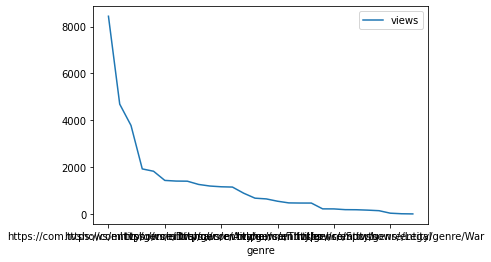

In [52]:
most_viewed_genre.plot(x ='genre', y='views', kind = 'line')
plt.show()